In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importing yfinance library to help us gathering data from Yahoo finance
import yfinance as yf
# Importing datetime and calendar to handling the change from dates to day names
from datetime import datetime
import calendar
%matplotlib inline 

### Let's find out best days to invest in NASAQ 100

In [2]:
# Accessing ticker data using Ticker moudle in yfinance library 
nasdaq100 = yf.Ticker("NDX")

In [3]:
# Getting NASDAQ 100 informations
nasdaq100.info

{'symbol': 'NDX',
 'quoteType': 'MUTUALFUND',
 'exchange': 'YHD',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'gmtOffSetMilliseconds': '-14400000',
 'market': 'us_market',
 'isEsgPopulated': False,
 'quoteSourceName': 'Delayed Quote',
 'regularMarketOpen': None,
 'averageDailyVolume3Month': 0,
 'regularMarketTime': 1561759658,
 'volume24Hr': None,
 'regularMarketDayHigh': None,
 'shortName': None,
 'averageDailyVolume10Day': 0,
 'longName': None,
 'regularMarketChange': None,
 'regularMarketPreviousClose': None,
 'preMarketPrice': None,
 'exchangeDataDelayedBy': 0,
 'toCurrency': None,
 'postMarketChange': None,
 'postMarketPrice': None,
 'exchangeName': 'YHD',
 'preMarketChange': None,
 'circulatingSupply': None,
 'regularMarketDayLow': None,
 'priceHint': 2,
 'regularMarketPrice': None,
 'regularMarketVolume': None,
 'lastMarket': None,
 'regularMarketSource': 'DELAYED',
 'openInterest': None,
 'marketState': 'CLOSED',
 'underlyingSymbol': None,

In [4]:
# Getting all history data
data_nasdaq100 = nasdaq100.history(period='MAX')

In [5]:
# Printing the data which is a pandas DataFrame 
data_nasdaq100

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,153160000,0,0.0
1985-10-02,112.139999,112.540001,110.779999,110.824997,164640000,0,0.0
1985-10-03,110.839996,111.184998,110.120003,110.870003,147300000,0,0.0
1985-10-04,110.870003,110.870003,109.855003,110.074997,147900000,0,0.0
1985-10-07,110.074997,110.135002,108.175003,108.199997,128640000,0,0.0
...,...,...,...,...,...,...,...
2022-08-08,13227.089844,13394.540039,13103.799805,13159.160156,5190590000,0,0.0
2022-08-09,13064.240234,13095.700195,12945.599609,13008.169922,5271940000,0,0.0
2022-08-10,13330.660156,13386.849609,13220.049805,13378.320312,5135480000,0,0.0


In [6]:
# I created new column name Date, with data of index
data_nasdaq100['Date'] = data_nasdaq100.index

In [7]:
# I created a lambda function so i can get the names of days from date
data_nasdaq100['dayName'] = data_nasdaq100['Date'].apply(lambda x : calendar.day_name[x.weekday()])

In [8]:
# Printing the dataframe
data_nasdaq100

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dayName
Date,,,,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,153160000,0,0.0,1985-10-01,Tuesday
1985-10-02,112.139999,112.540001,110.779999,110.824997,164640000,0,0.0,1985-10-02,Wednesday
1985-10-03,110.839996,111.184998,110.120003,110.870003,147300000,0,0.0,1985-10-03,Thursday
1985-10-04,110.870003,110.870003,109.855003,110.074997,147900000,0,0.0,1985-10-04,Friday
1985-10-07,110.074997,110.135002,108.175003,108.199997,128640000,0,0.0,1985-10-07,Monday
...,...,...,...,...,...,...,...,...,...
2022-08-08,13227.089844,13394.540039,13103.799805,13159.160156,5190590000,0,0.0,2022-08-08,Monday
2022-08-09,13064.240234,13095.700195,12945.599609,13008.169922,5271940000,0,0.0,2022-08-09,Tuesday
2022-08-10,13330.660156,13386.849609,13220.049805,13378.320312,5135480000,0,0.0,2022-08-10,Wednesday


In [9]:
# Calculating the daily simple return 'DSR' and stock it in column named DSR
data_nasdaq100['DSR'] = data_nasdaq100['Close'].pct_change()

In [10]:
data_nasdaq100

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dayName,DSR
Date,,,,,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,153160000,0,0.0,1985-10-01,Tuesday,NaN
1985-10-02,112.139999,112.540001,110.779999,110.824997,164640000,0,0.0,1985-10-02,Wednesday,-0.011726
1985-10-03,110.839996,111.184998,110.120003,110.870003,147300000,0,0.0,1985-10-03,Thursday,0.000406
1985-10-04,110.870003,110.870003,109.855003,110.074997,147900000,0,0.0,1985-10-04,Friday,-0.007171
1985-10-07,110.074997,110.135002,108.175003,108.199997,128640000,0,0.0,1985-10-07,Monday,-0.017034
...,...,...,...,...,...,...,...,...,...,...
2022-08-08,13227.089844,13394.540039,13103.799805,13159.160156,5190590000,0,0.0,2022-08-08,Monday,-0.003674
2022-08-09,13064.240234,13095.700195,12945.599609,13008.169922,5271940000,0,0.0,2022-08-09,Tuesday,-0.011474
2022-08-10,13330.660156,13386.849609,13220.049805,13378.320312,5135480000,0,0.0,2022-08-10,Wednesday,0.028455


In [11]:
# Removing the first row of data because it's first day with NaN DSR
data_nasdaq100 = data_nasdaq100[1:]

In [12]:
data_nasdaq100

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dayName,DSR
Date,,,,,,,,,,
1985-10-02,112.139999,112.540001,110.779999,110.824997,164640000,0,0.0,1985-10-02,Wednesday,-0.011726
1985-10-03,110.839996,111.184998,110.120003,110.870003,147300000,0,0.0,1985-10-03,Thursday,0.000406
1985-10-04,110.870003,110.870003,109.855003,110.074997,147900000,0,0.0,1985-10-04,Friday,-0.007171
1985-10-07,110.074997,110.135002,108.175003,108.199997,128640000,0,0.0,1985-10-07,Monday,-0.017034
1985-10-08,108.199997,108.269997,106.750000,107.160004,144100000,0,0.0,1985-10-08,Tuesday,-0.009612
...,...,...,...,...,...,...,...,...,...,...
2022-08-08,13227.089844,13394.540039,13103.799805,13159.160156,5190590000,0,0.0,2022-08-08,Monday,-0.003674
2022-08-09,13064.240234,13095.700195,12945.599609,13008.169922,5271940000,0,0.0,2022-08-09,Tuesday,-0.011474
2022-08-10,13330.660156,13386.849609,13220.049805,13378.320312,5135480000,0,0.0,2022-08-10,Wednesday,0.028455


In [13]:
# Creating new df grouped by dayName and mean values of DSR
df_nasdaq100 = data_nasdaq100.groupby('dayName').mean()
df_nasdaq100

,Open,High,Low,Close,Volume,Dividends,Stock Splits,DSR
dayName,,,,,,,,
Friday,2758.290951,2779.157780,2733.514369,2757.770987,1.558023e+09,0.0,0.00000,0.000017
Monday,2738.024158,2760.192287,2714.122501,2739.074303,1.446247e+09,0.0,0.00114,-0.000049
Thursday,2771.840769,2796.036114,2747.475939,2773.270812,1.586435e+09,0.0,0.00000,0.000782
Tuesday,2765.864085,2788.309297,2741.304894,2765.567995,1.549898e+09,0.0,0.00000,0.000754
Wednesday,2764.713311,2788.622057,2740.625353,2765.715158,1.583805e+09,0.0,0.00000,0.001694


Text(0.5, 1.0, 'Best and Worst Days To Invest In The NASDAQ 100')

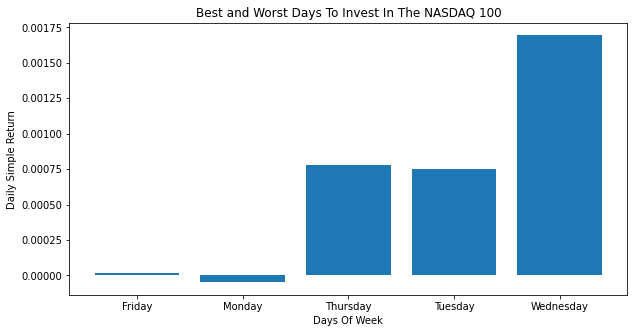

In [14]:
# Plotting the data
fig_nasdaq100 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_nasdaq100.index, df_nasdaq100['DSR'])
 
plt.xlabel("Days Of Week")
plt.ylabel("Daily Simple Return")
plt.title("Best and Worst Days To Invest In The NASDAQ 100")

### We will do the same steps to find out best days to invest in gold

In [15]:
# Accessing ticker data 
gold = yf.Ticker("Gold")

In [16]:
# Getting GOLD informations
gold.info

{'zip': 'M5J 2S1',
 'sector': 'Basic Materials',
 'longBusinessSummary': "Barrick Gold Corporation engages in the exploration, mine development, production, and sale of gold and copper properties. It has ownership interests in producing gold mines that are located in Argentina, Canada, Côte d'Ivoire, the Democratic Republic of Congo, Dominican Republic, Mali, Tanzania, and the United States. The company also has ownership interests in producing copper mines located in Chile, Saudi Arabia, and Zambia; and various other projects located throughout the Americas and Africa. Barrick Gold Corporation was founded in 1983 and is headquartered in Toronto, Canada.",
 'city': 'Toronto',
 'state': 'ON',
 'country': 'Canada',
 'companyOfficers': [],
 'website': 'https://www.barrick.com',
 'maxAge': 1,
 'address1': 'TD Canada Trust Tower',
 'industry': 'Gold',
 'address2': 'Suite 3700 161 Bay Street Brookfield Place',
 'ebitdaMargins': 0.52279,
 'profitMargins': 0.16871999,
 'grossMargins': 0.39044,

In [17]:
# Getting all history data
data_gold = gold.history(period='MAX')

In [18]:
# Printing the data which is a pandas DataFrame
data_gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-02-13,0.000000,0.486036,0.432032,0.432032,19680,0.0,0.0
1985-02-14,0.000000,0.486036,0.432032,0.432032,65920,0.0,0.0
1985-02-15,0.000000,0.486036,0.432032,0.432032,31360,0.0,0.0
1985-02-19,0.000000,0.432032,0.432032,0.432032,9120,0.0,0.0
1985-02-20,0.000000,0.432032,0.432032,0.432032,40000,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-08,16.059999,16.459999,15.950000,16.200001,24704200,0.0,0.0
2022-08-09,16.410000,16.450001,15.990000,16.440001,23465000,0.0,0.0
2022-08-10,16.620001,16.780001,16.340000,16.530001,22004500,0.0,0.0


In [19]:
# I created new column name Date, with data of index
data_gold['Date'] = data_gold.index

In [20]:
# I created a lambda function so i can get the names of days from date
data_gold['dayName'] = data_gold['Date'].apply(lambda x : calendar.day_name[x.weekday()])

In [21]:
data_gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dayName
Date,,,,,,,,,
1985-02-13,0.000000,0.486036,0.432032,0.432032,19680,0.0,0.0,1985-02-13,Wednesday
1985-02-14,0.000000,0.486036,0.432032,0.432032,65920,0.0,0.0,1985-02-14,Thursday
1985-02-15,0.000000,0.486036,0.432032,0.432032,31360,0.0,0.0,1985-02-15,Friday
1985-02-19,0.000000,0.432032,0.432032,0.432032,9120,0.0,0.0,1985-02-19,Tuesday
1985-02-20,0.000000,0.432032,0.432032,0.432032,40000,0.0,0.0,1985-02-20,Wednesday
...,...,...,...,...,...,...,...,...,...
2022-08-08,16.059999,16.459999,15.950000,16.200001,24704200,0.0,0.0,2022-08-08,Monday
2022-08-09,16.410000,16.450001,15.990000,16.440001,23465000,0.0,0.0,2022-08-09,Tuesday
2022-08-10,16.620001,16.780001,16.340000,16.530001,22004500,0.0,0.0,2022-08-10,Wednesday


In [22]:
# Calculting the daily simple return 'DSR'
data_gold['DSR'] = data_gold['Close'].pct_change()

In [23]:
# Removing the first row of data because it's first day with NaN DSR
data_gold = data_gold[1:]
data_gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dayName,DSR
Date,,,,,,,,,,
1985-02-14,0.000000,0.486036,0.432032,0.432032,65920,0.0,0.0,1985-02-14,Thursday,0.000000
1985-02-15,0.000000,0.486036,0.432032,0.432032,31360,0.0,0.0,1985-02-15,Friday,0.000000
1985-02-19,0.000000,0.432032,0.432032,0.432032,9120,0.0,0.0,1985-02-19,Tuesday,0.000000
1985-02-20,0.000000,0.432032,0.432032,0.432032,40000,0.0,0.0,1985-02-20,Wednesday,0.000000
1985-02-21,0.000000,0.432032,0.432032,0.432032,28960,0.0,0.0,1985-02-21,Thursday,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-08-08,16.059999,16.459999,15.950000,16.200001,24704200,0.0,0.0,2022-08-08,Monday,0.038462
2022-08-09,16.410000,16.450001,15.990000,16.440001,23465000,0.0,0.0,2022-08-09,Tuesday,0.014815
2022-08-10,16.620001,16.780001,16.340000,16.530001,22004500,0.0,0.0,2022-08-10,Wednesday,0.005474


In [24]:
# Creating new df grouped by dayName and mean values of DSR
df_gold = data_gold.groupby('dayName').mean()
df_gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits,DSR
dayName,,,,,,,,
Friday,16.488928,16.732226,16.259105,16.496608,6.567555e+06,0.000892,0.000106,0.001460
Monday,16.393711,16.620393,16.147682,16.371101,6.078705e+06,0.000634,0.000000,-0.000748
Thursday,16.512909,16.767337,16.254430,16.502427,6.891914e+06,0.000723,0.001051,0.001087
Tuesday,16.455200,16.702955,16.207945,16.453375,6.514115e+06,0.000676,0.002064,0.000648
Wednesday,16.506966,16.770963,16.255378,16.509839,6.855695e+06,0.001454,0.000000,0.001168


Text(0.5, 1.0, 'Best and Worst Days To Invest In The Gold')

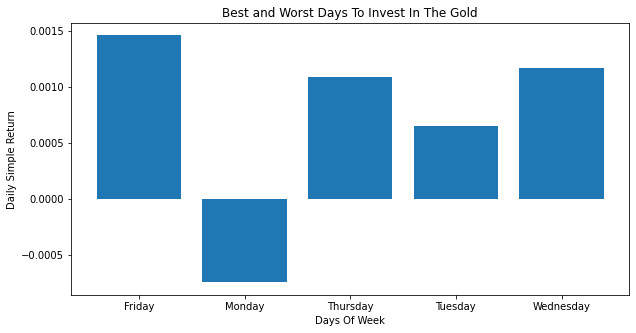

In [25]:
# Plotting the data
fig_gold = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_gold.index, df_gold['DSR'])
plt.xlabel("Days Of Week")
plt.ylabel("Daily Simple Return")
plt.title("Best and Worst Days To Invest In The Gold")